0.95
1095.8429611


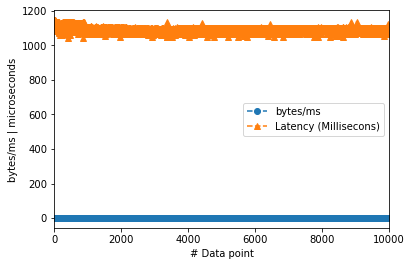

In [13]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1510670606_full_vector_encoder_1_0_8_134217728')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])
latency = [lat/(1000) for lat in latency]
throughput = [th/(1000) for th in throughput] 
print(throughput[0])

avg_latency = 0.0
for val in latency:
    avg_latency = avg_latency + val
    
avg_latency = avg_latency / len(latency)
print avg_latency

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/ms', 'Latency (Millisecons)'])
plt.ylabel('bytes/ms | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_64_16.eps')
plt.show()

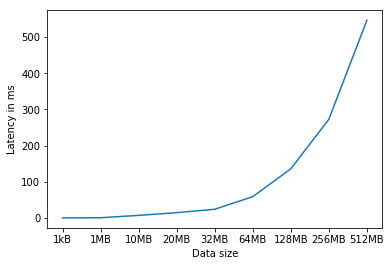

In [27]:
## Generation Size: 8 
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)
    
one_kb = 'results/1510751197_full_vector_encoder_1_0_8_128'
one_mb = 'results/1510751438_full_vector_encoder_1_0_8_131072'
ten_mb = 'results/1510752389_full_vector_encoder_1_0_8_1310720'
twenty_mb = 'results/1510822030_full_vector_encoder_1_0_8_2621440'
thirdy_two_mb = 'results/1510824925_full_vector_encoder_1_0_8_4194304'
sixty_four_mb = 'results/1510836357_full_vector_encoder_1_0_8_8388608'
one_hundre_and_twenty_eight_mb = 'results/1510847597_full_vector_encoder_1_0_8_16777216'
two_hundre_and_fifty_six_mb = 'results/1510927849_full_vector_encoder_1_0_8_33554432'
five_hundre_and_twelve_mb = 'results/1510972685_full_vector_encoder_1_0_8_67108864'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)
plt.plot(data_size, latency)
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_8.eps')
plt.show()
